## Parte 1

In [65]:
x1 = [2.1,1.4,5.3,4.2,4.1]
x2 = [50,75,200,150,230]
y = ['Dog', 'Dog', 'Horse', 'Dog', 'Horse']

Elegir un valor para dividir la Altura (Height) que mejor prediga de qué animal se trata y calcular la ganancia de información

* x1 = altura
* x2 = peso
* y = animal

In [66]:
import pandas as pd
import numpy as np

*Valor electo de x1: 4*

In [67]:
#Entropía general
#Cuántos, con este corte, pertenecerían al subgrupo 'Horse' y cuántos al otro
S = -1*(3/5*np.log2(3/5)+2/5*np.log2(2/5))
S

0.9709505944546686

In [68]:
#Índice de Gini
#Entropía del nodo
#Cuántos, con este corte, son realmente 'Dog' y cuántos son realmente 'Horse' del subgrupo categorizado como 'Horse'
G = -1*(1/3*np.log2(1/3)+2/3*np.log2(2/3))
G

0.9182958340544896

In [69]:
#Entropía del otro nodo
N = 0

In [70]:
#Ganancia de información
IG = S -(3/5*G+2/5*N)
IG

0.4199730940219749

In [71]:
print('La ganancia de información es:', IG)

La ganancia de información es: 0.4199730940219749


Elegir un valor que divida el Peso (Weight) que mejor prediga de qué animal se trata y calcular la ganancia de información


*Valor electo de x2: 200*

In [72]:
#Entropía general
#Cuántos, con este corte, pertenecerían al subgrupo 'Horse' y cuántos al otro
S = -1*(2/5*np.log2(2/5)+3/5*np.log2(3/5))
S

0.9709505944546686

In [73]:
#Índice de Gini
#Entropía del nodo
#Cuántos, con este corte, son realmente 'Dog' y cuántos son realmente 'Horse' del subgrupo categorizado como 'Horse'
G = 0

In [74]:
#Entropía del otro nodo
N = 0

In [75]:
#Ganancia de información
IG = S-(2/5*G+3/5*N)
IG

0.9709505944546686

¿Cuál de estas divisiones tuvo la mayor ganancia de información?

*La segunda división utilizando el input del peso*

## Parte 2

In [76]:
train = pd.read_csv('train.csv', index_col='PassengerId')

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


*Hay NA en 'AGE' y 'EMBARKED', no hay casi información en 'CABIN' 

In [78]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [79]:
train=train.drop(columns=['Cabin'])

In [80]:
train['Embarked']=train['Embarked'].fillna('S')

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [82]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [83]:
embarked = pd.get_dummies(train['Embarked'])
embarked.head()

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [84]:
train = pd.concat([train, embarked], axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1


In [85]:
train=train.drop(columns=['Embarked'])

In [86]:
train['Sex']=train['Sex'].map({'male':0, 'female':1})
train=train.drop(columns=['Name', 'Ticket'])

In [87]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [88]:
import plotly.express as px

In [89]:
px.histogram(train, x='Pclass', y='Survived', color='Sex')

In [90]:
import seaborn as sns

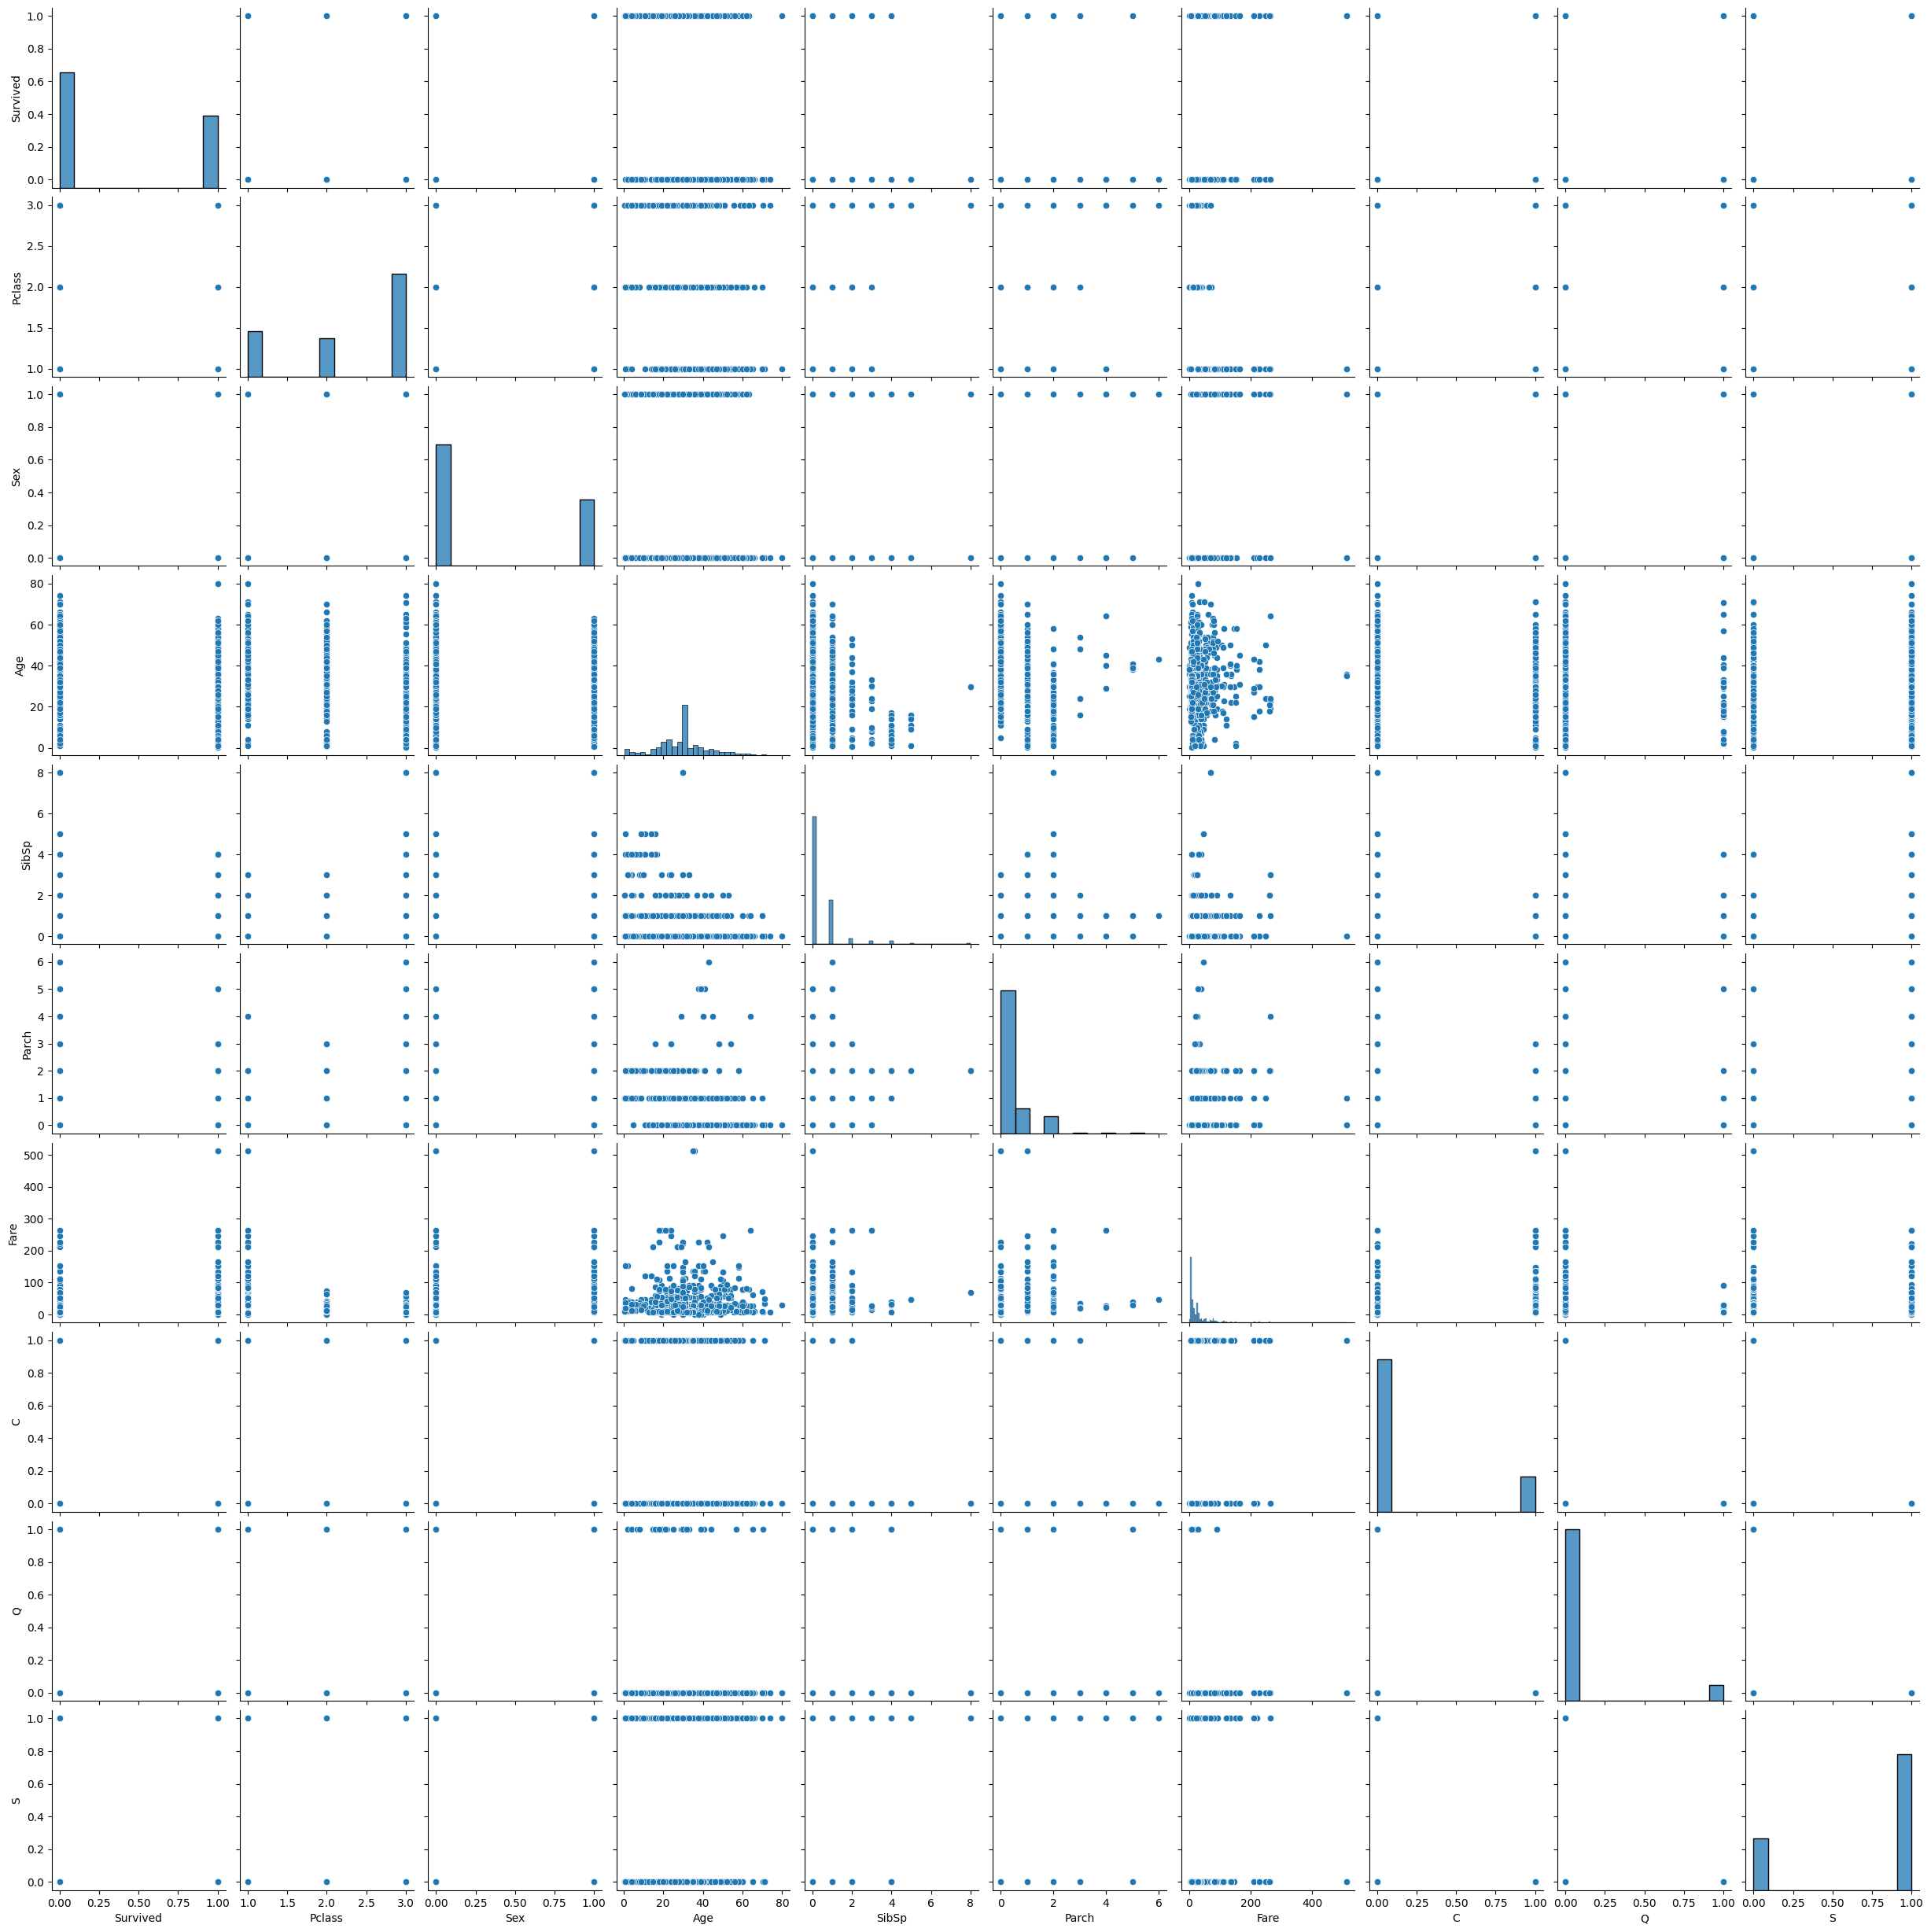

In [91]:
sns.pairplot(train)

In [115]:
test = pd.read_csv('test.csv', index_col='PassengerId')

In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [117]:
#test['Age']=test['Age'].fillna(train['Age'].mean)
#test['Fare']=test['Fare'].fillna(train['Fare'].mean)
test['Sex']=test['Sex'].map({'male':0, 'female':1})
embarked = pd.get_dummies(test['Embarked'])
test = pd.concat([test, embarked], axis=1)
test = test.drop(columns=['Cabin','Name', 'Embarked'])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
PassengerId,,,,,,,,,,
892,3,0,34.5,0,0,330911,7.8292,0,1,0
893,3,1,47.0,1,0,363272,7.0000,0,0,1
894,2,0,62.0,0,0,240276,9.6875,0,1,0
895,3,0,27.0,0,0,315154,8.6625,0,0,1
896,3,1,22.0,1,1,3101298,12.2875,0,0,1


In [118]:
test=test.drop(columns=['Ticket'])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,
892,3,0,34.5,0,0,7.8292,0,1,0
893,3,1,47.0,1,0,7.0000,0,0,1
894,2,0,62.0,0,0,9.6875,0,1,0
895,3,0,27.0,0,0,8.6625,0,0,1
896,3,1,22.0,1,1,12.2875,0,0,1


In [120]:
test['Age']=test['Age'].fillna(train['Age'].mean())
test['Fare']=test['Fare'].fillna(train['Fare'].mean())

In [121]:
df = pd.read_csv('ground_truth.csv', index_col='PassengerId')

In [122]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [123]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S'], dtype='object')

In [124]:
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q','S']]
y_train = train[['Survived']]

In [125]:
X_test = test
y_test = df

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Con árboles de decisión

In [127]:
dt = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

In [128]:
dt.score(X_test, y_test)

0.9545454545454546

In [129]:
dt.feature_importances_

array([0.20260669, 0.59672151, 0.07296512, 0.04262917, 0.01399794,
       0.07107958, 0.        , 0.        , 0.        ])

Las dos columnas más importantes como predictoras de y son 'PCLASS' y 'SEX'

In [130]:
most_important = dt.feature_importances_.argsort()[-2:]
X_train.columns[most_important].values

array(['Pclass', 'Sex'], dtype=object)

Ahora con un logit

In [137]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict_proba(X_test)[:,1]

c:\Users\ncordova\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ncordova\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Área bajo la curva

In [136]:
from sklearn.metrics import roc_auc_score, roc_curve, r2_score, f1_score, mean_squared_error, precision_score, recall_score, accuracy_score, make_scorer

In [140]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [141]:
auc = roc_auc_score(y_test,y_pred)
auc

0.9811782746339532

Se observa que con logit, el desempeño del modelo es mejor que respecto al Árbol de decisión

Utilizando un KNN...

In [146]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc = accuracy_score(y_true=y_test,y_pred=y_pred_knn)

c:\Users\ncordova\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [147]:
acc

0.6746411483253588

El desempeño de KNN no es mejor que los otros dos. 

In [149]:
import matplotlib.pyplot as plt

AUC de la regresión logística dado su desempeño superior a los otros dos

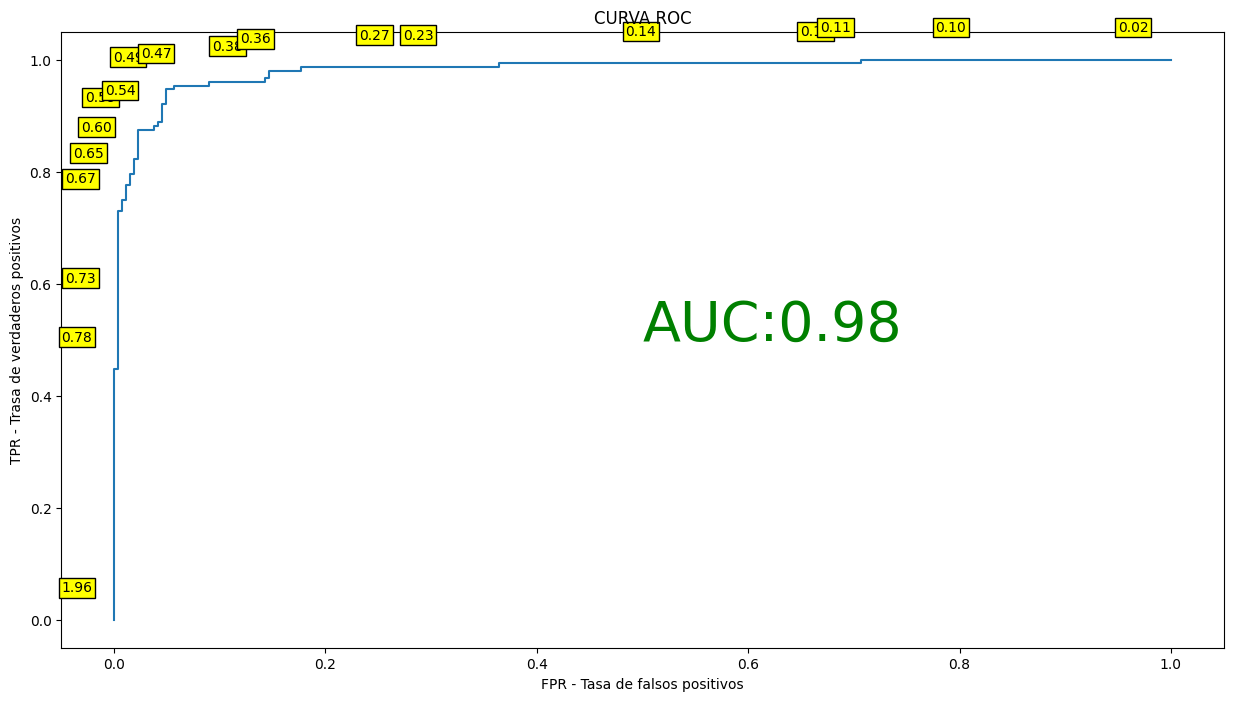

In [157]:
fig, ax=plt.subplots(1,1, figsize=(15,8))
ax.plot(fpr,tpr)
ax.set_title('CURVA ROC')
ax.set_xlabel('FPR - Tasa de falsos positivos')
ax.set_ylabel('TPR - Trasa de verdaderos positivos')
ax.text(0.5,0.5,f"AUC:{auc:0.2f}", c='green', fontdict={'size':40})
for i, (f,t,x) in enumerate (zip(fpr,tpr,thr)):
    if i % 4 == 0:
        ax.text(f-0.05,t+0.05,f'{x:0.2f}',bbox={'facecolor':'yellow','pad':2})